In [1]:
# OASM 
#02/11/2024
# DataSet analisis de sentimientos de productos de amazon 1-5
# En el data la pagina obtenida del dataset manejan los datos como
# 1-3 como negativas y 4-5 como positivos
# para tener un balanceo de 50 y 50, ya que actualmente esta 60-40
# podriamos aumentar el numero de comentarios similares en clasifcados como buenos
# esto en caso de que solo clasificquemos como bueno positivo o ngeativo en cawso contraario
#que tomemos cada nivel como una clase entonces no seria necesaria balancear los datos todos estan equilibradas.
# ESTA EN ESPAÑOL E INGLES LAS RESE{ÑAS}


import pandas as pd
#import numpy as np 

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')

data = pd.read_csv('https://raw.githubusercontent.com/ignaciomsarmiento/RecomSystemsLectures/main/L07_sentimientos/data/Amazon.csv', index_col="Unnamed: 0")

data.head()

,id,reviews.text,reviews.rating,reviews.text_esp
0,AVqVGWQDv8e3D1O-ldFr,This is a very nice tablet for my GF who has n...,5.0,Esta es una tableta muy agradable para mi novi...
1,AVqkIhwDv8e3D1O-lebb,Love this tablet. Easy to use. And price was r...,5.0,Me encanta esta tableta. Fácil de usar. Y el p...
2,AVphgVaX1cnluZ0-DR74,Affordable price awesome quality I love my Ama...,5.0,Precio asequible calidad increíble Me encanta ...
3,AVphgVaX1cnluZ0-DR74,I bought this after speaking with a sales rep ...,5.0,Compré esto después de hablar con un represent...
4,AVqVGWLKnnc1JgDc3jF1,Bought this tablet for my 2 &1/2 year old and ...,5.0,Compré esta tableta para mi hijo de 2 años y m...


#Distribucion de clases
esto solo en caso e que solo sea positivo y negativo la clasificacion

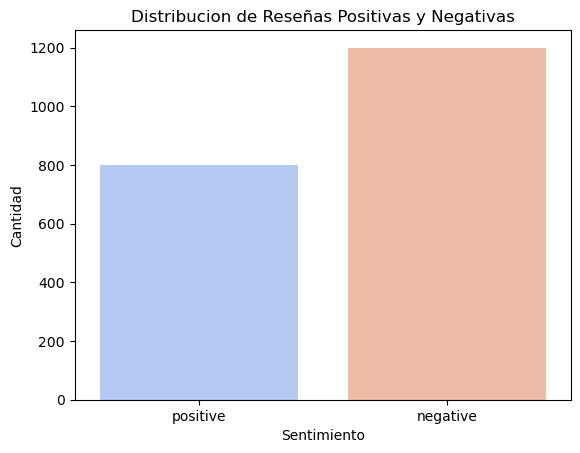

,id,reviews.text,reviews.rating,reviews.text_esp,sentiment,puntaje,sentimiento
0,AVqVGWQDv8e3D1O-ldFr,This is a very nice tablet for my GF who has n...,5.0,Esta es una tableta muy agradable para mi novi...,positive,1,POSITIVO
1,AVqkIhwDv8e3D1O-lebb,Love this tablet. Easy to use. And price was r...,5.0,Me encanta esta tableta. Fácil de usar. Y el p...,positive,1,POSITIVO
2,AVphgVaX1cnluZ0-DR74,Affordable price awesome quality I love my Ama...,5.0,Precio asequible calidad increíble Me encanta ...,positive,1,POSITIVO
3,AVphgVaX1cnluZ0-DR74,I bought this after speaking with a sales rep ...,5.0,Compré esto después de hablar con un represent...,positive,1,POSITIVO
4,AVqVGWLKnnc1JgDc3jF1,Bought this tablet for my 2 &1/2 year old and ...,5.0,Compré esta tableta para mi hijo de 2 años y m...,positive,1,POSITIVO


In [2]:
#print(data.columns)
data['sentiment'] = data['reviews.rating'].apply(lambda x: 'positive' if x >= 4 else 'negative')

#reseñas positivas y negativas
sns.countplot(x='sentiment', data=data, palette='coolwarm')
plt.title('Distribucion de Reseñas Positivas y Negativas')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.show()

# mapear
puntaje = {
    1 : 0,
    2: 0,
    3: 0,
    4: 1,
    5: 1
}

sentimiento = {
    0: 'NEGATIVO',
    1: 'POSITIVO',
}

# MAPEANDO
data['puntaje'] = data['reviews.rating'].map(puntaje)
data['sentimiento'] = data['puntaje'].map(sentimiento)

data.head()

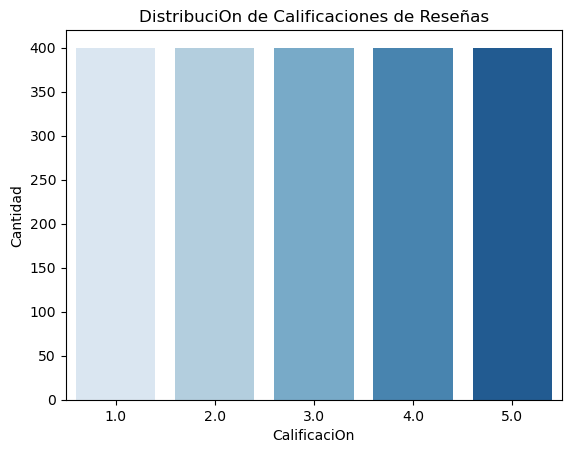

In [3]:
sns.countplot(x='reviews.rating', data=data, palette='Blues')
plt.title('DistribuciOn de Calificaciones de Reseñas')
plt.xlabel('CalificaciOn')
plt.ylabel('Cantidad')
plt.show()

Preprocesamiento

In [4]:
import string
import spacy
from num2words import num2words
import pandas as pd


data = data[['reviews.text_esp', 'reviews.rating']]
#print(data.head())


nlp = spacy.load('es_core_news_sm')


stop_words_adicionales = {"¡", "-", "—", "http","<",">"}

for palabra in stop_words_adicionales:
    nlp.Defaults.stop_words.add(palabra)


def procesar_texto(texto):
    oraciones = texto.split('\n')
    total_oraciones = len(oraciones)
    oraciones_tokenizadas = []
    
    for oracion in oraciones:
        tokens = []
        doc = nlp(oracion)
        for token in doc:
                if token.is_digit:
                    try:
                        numero = int(token.text)  # Convertir texto a número
                        palabra_letras = num2words(numero, lang='es')  # Convertir número a palabras 
                        tokens.append(palabra_letras)
                    except ValueError:
                        pass
                else:
                    lemma = token.text.lower()  # Convertir a minúsculas  # Quitar puntuación
                    if lemma and lemma not in stop_words_adicionales:  # Evitar agregar cadenas vacías y stop words
                        tokens.append(lemma)
        oraciones_tokenizadas.append(" ".join(tokens))  
    
    return total_oraciones, oraciones_tokenizadas


data['total_oraciones'], data['oraciones_tokenizadas'] = zip(*data['reviews.text_esp'].apply(procesar_texto))


print(data[['reviews.text_esp', 'oraciones_tokenizadas', 'reviews.rating']].head())



                                    reviews.text_esp  \
0  Esta es una tableta muy agradable para mi novi...   
1  Me encanta esta tableta. Fácil de usar. Y el p...   
2  Precio asequible calidad increíble Me encanta ...   
3  Compré esto después de hablar con un represent...   
4  Compré esta tableta para mi hijo de 2 años y m...   

                               oraciones_tokenizadas  reviews.rating  
0  [esta es una tableta muy agradable para mi nov...             5.0  
1  [me encanta esta tableta . fácil de usar . y e...             5.0  
2  [precio asequible calidad increíble me encanta...             5.0  
3  [compré esto después de hablar con un represen...             5.0  
4  [compré esta tableta para mi hijo de dos años ...             5.0  


EMBEDINGS

In [ ]:
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel


tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")
model = AutoModel.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

# embedding promedio de una oración
def obtener_embedding_oracion(oracion):
    inputs = tokenizer(oracion, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# obtener el embedding promedio de una reseña completa
def obtener_embedding_resena(oraciones_tokenizadas):
    embeddings_oraciones = [obtener_embedding_oracion(oracion) for oracion in oraciones_tokenizadas]
    return np.mean(embeddings_oraciones, axis=0) if embeddings_oraciones else np.zeros(model.config.hidden_size)


data['embedding_resena'] = data['oraciones_tokenizadas'].apply(obtener_embedding_resena)


embeddings_df = pd.DataFrame(data['embedding_resena'].to_list())
embeddings_df.to_csv('embeddings_por_resen1.csv', index=False)

print("Embeddings por reseña guardados ''.")


Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Embeddings por reseña guardados en el archivo 'embeddings_por_resena1.csv'.


Clusterizarr

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Cargar embeddings promediado
embeding_reseña = pd.read_csv('embeddings_por_resen1.csv') 


kmeans = KMeans(n_clusters=2, random_state=42)
etiquetas_clusters = kmeans.fit_predict(embeding_reseña)



"""pca = PCA(n_components=2)
pca_2d = pca.fit_transform(embeding_reseña)

# Graficar los resultados
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=etiquetas_clusters, cmap='viridis', s=50, alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title("Resultados de K-Means")
plt.colorbar(scatter, label='Cluster')
plt.show()"""


# Crear un DataFrame para analizar los resultados
data_clusters = pd.DataFrame({
    'reseña': data['reviews.text_esp'],
    'oraciones_tokenizadas': data['oraciones_tokenizadas'],
    'rating': data['reviews.rating'],
    'cluster': etiquetas_clusters
})


# Guardar el DataFrame en un archivo CSV con codificación UTF-8
data_clusters.to_csv('reseñas_con_clusters.csv', index=False, encoding='utf-8')
print("Reseñas con sus clusters.")

data_clusters = pd.read_csv('reseñas_con_clusters.csv', encoding='utf-8')


Reseñas con sus clusters guardadas en 'reseñas_con_clusters.csv'.


Graficos para entender que tan bien clusterizo y entender la distribución

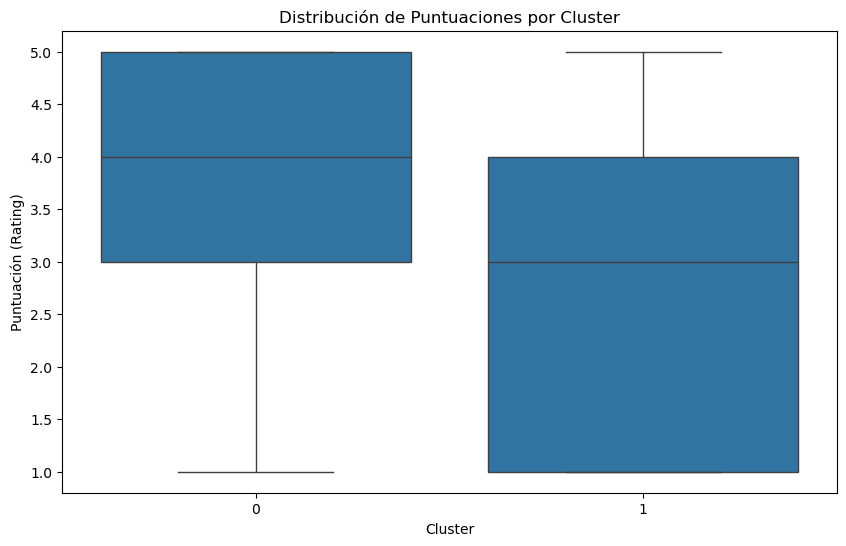

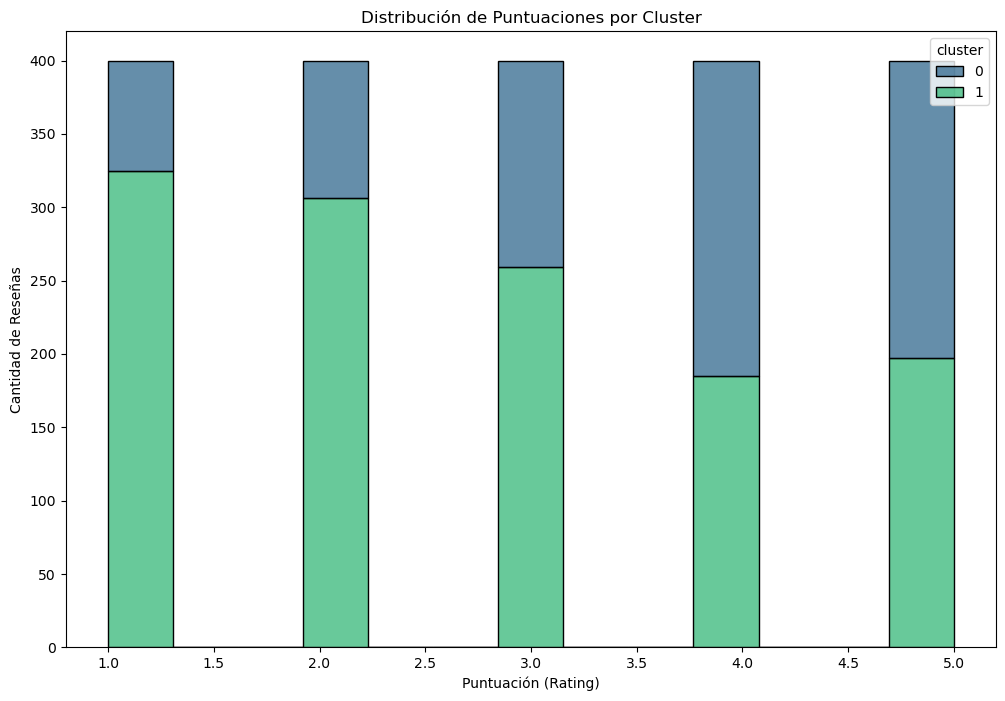

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de ratings en cada cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='rating', data=data_clusters)
plt.title("Distribución de Puntuaciones por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Puntuación (Rating)")
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de las puntuaciones en cada cluster
plt.figure(figsize=(12, 8))
sns.histplot(data=data_clusters, x='rating', hue='cluster', multiple='stack', palette='viridis')
plt.title("Distribución de Puntuaciones por Cluster")
plt.xlabel("Puntuación (Rating)")
plt.ylabel("Cantidad de Reseñas")
plt.show()
